* * *
<pre> NYU Paris            <i> Machine Learning - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab: the multilayer perceptron </h1>

<pre align="left"> June 07th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goal:
- Implement your Multilayer perceptron model

## Installing and importing Pytorch

In [3]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor


# Versions of torch and torchvision have to be compatible.
# check here: https://github.com/pytorch/pytorch/wiki/PyTorch-Versions

In [4]:
import torchvision

In [5]:
print(torch.__version__)
print(torchvision.__version__)

2.2.2
0.17.2


### Loading and preparing the MNIST dataset

In [7]:
# Define training and testing data using the functions in the cell above. 

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Question 1

### Visualize some elements of the dataset:

In [9]:
print(train_data.data.shape)

torch.Size([60000, 28, 28])


In [10]:
import matplotlib.pyplot as plt

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


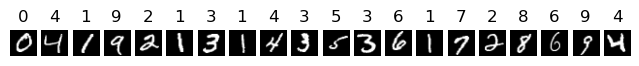

In [11]:
import matplotlib.pyplot as plt
# Visualize some images of the MNIST dataset
# Size of training data
print(train_data.data.shape)

# Size of testing data
print(test_data.data.shape)

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 20,1
for i in range(1, cols * rows + 1):
    sample_idx = i  # to do
    img, label = train_data[i]   # To do
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [12]:
train_data.targets[0].item()

5

## Question 2

### Define a dataloader to construct a batch-wise iterator from your train/test data


In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4
trainloader = DataLoader(train_data, BATCH_SIZE, shuffle = True)
testloader = DataLoader(test_data,BATCH_SIZE,shuffle = True)

## Question 3

### Design your own Neural Network

In [16]:
import torch.nn as nn
import torch.nn.functional as F
# number of features (len of X cols)
input_dim = 28 * 28

# number of hidden layers
hidden_dim = 256

# number of classes (unique of y)
output_dim = 10

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim) # to do
        self.linear2 = nn.Linear(hidden_dim, output_dim)# To do this with your own o

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        h_relu = F.relu(self.linear1(x))# To do
        y_pred = self.linear2(h_relu) # To do
        return y_pred

In [17]:
# input_dim

## Question 4

### Train your neural network on the trainloader

In [19]:
from torch.nn.functional import nll_loss, cross_entropy
import torch.optim as optim

mlp = MLP()    #create the instance of image classifier
# print(mlp.parameters)

# Optimizer
epochs = 5    #goes through the data only ten times
learning_rate = 1e-6
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

# Choice of the loss
criterion = nn.CrossEntropyLoss() # nll_loss

losses = []
count = 0
for t in range(epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        
        # Evaluate the loss
        outputs = mlp(inputs) # To do
        # loss = nll_loss(outputs, labels)
        loss = criterion(outputs,labels) # to do
        
        # backward propagation
        # To do
        loss.backward()
        optimizer.step()
        
        # One optimization step
        # to do
        losses.append(loss.item())
        
        if not i % 2000:
            print(f'epoch {t}, input = {i}, loss = {loss.item()}')

epoch 0, input = 0, loss = 2.2861227989196777
epoch 0, input = 2000, loss = 2.2701215744018555
epoch 0, input = 4000, loss = 2.256208896636963
epoch 0, input = 6000, loss = 2.149047613143921
epoch 0, input = 8000, loss = 2.14493465423584
epoch 0, input = 10000, loss = 2.0537047386169434
epoch 0, input = 12000, loss = 2.043017864227295
epoch 0, input = 14000, loss = 1.9209177494049072
epoch 1, input = 0, loss = 2.0383758544921875
epoch 1, input = 2000, loss = 1.8723068237304688
epoch 1, input = 4000, loss = 1.4523084163665771
epoch 1, input = 6000, loss = 1.6762275695800781
epoch 1, input = 8000, loss = 1.6475329399108887
epoch 1, input = 10000, loss = 1.513242483139038
epoch 1, input = 12000, loss = 1.6884773969650269
epoch 1, input = 14000, loss = 1.4167060852050781
epoch 2, input = 0, loss = 1.5826023817062378
epoch 2, input = 2000, loss = 1.3700637817382812
epoch 2, input = 4000, loss = 1.778617024421692
epoch 2, input = 6000, loss = 1.373152732849121
epoch 2, input = 8000, loss = 1

## Question 5

### Inspect the optimization procedure through the loss (plot the loss), what do you observe?

Text(0.5, 0, 'Iterations')

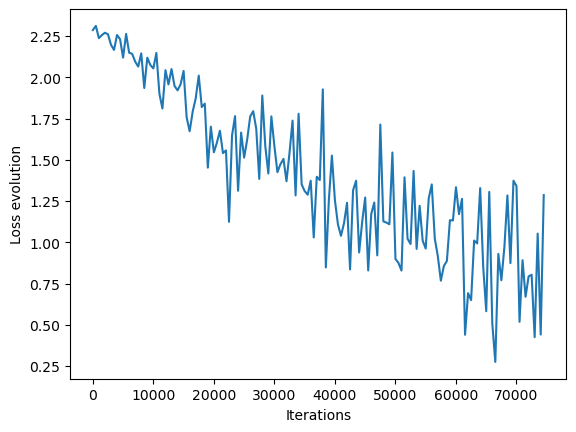

In [21]:
fig = plt.plot(range(0,len(losses),500),[losses[i] for i in range(0,len(losses),500)])
plt.ylabel("Loss evolution")
plt.xlabel("Iterations")
# print(losses)

It seems that the loss on average is decreasing but we still have cases where the loss is high. The above figure is just a plot for lossesat every 500th instance. It could be that our model stops at a state with a bad loss and might cause our model to predict badly.


## Question 6

### Evaluate the quality of your classifier on the test set

In [24]:
size_test = test_data.data.shape[0]

correct = 0

for data in testloader:
    inputs, labels = data
    outputs = mlp(inputs)# To do
    loss = criterion(outputs,labels)# To do
    predicted = torch.argmax(outputs,dim=1) # To do
    correct += (predicted == labels).sum()  
final_accuracy = correct.item()/size_test *100 # To do
print(size_test)
print(final_accuracy)

10000
85.02


## Question 7 (Bonus)

### Repeat this training with different loss (nll/cross_entropy...) and different number of epochs. What do you observe?

In [26]:
def bonus(training_loss, epoch):

    mlp1 = MLP()    #create the instance of image classifier
    # print(mlp.parameters)
    
    # Optimizer
    epochs = epoch    #goes through the data only ten times
    learning_rate = 1e-6
    optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)
    
    # Choice of the loss
    criterion = training_loss # nll_loss
    
    losses = []
    count = 0
    for t in range(epochs):
        for i, data in enumerate(trainloader):
            inputs, labels = data
            
            
            # set optimizer to zero grad to remove previous epoch gradients
            optimizer.zero_grad()
            
            # Evaluate the loss
            outputs = mlp(inputs) # To do
            # loss = nll_loss(outputs, labels)
            loss = criterion(outputs,labels) # to do
            
            # backward propagation
            # To do
            loss.backward()
            optimizer.step()
            
            # One optimization step
            # to do
            losses.append(loss.item())
            
            if not i % 2000:
                print(f'epoch {t}, input = {i}, loss = {loss.item()}')
    fig = plt.plot(range(0,len(losses),500),[losses[i] for i in range(0,len(losses),500)])
    plt.ylabel("Loss evolution")
    plt.xlabel("Iterations")

epoch 0, input = 0, loss = 0.7043243646621704
epoch 0, input = 2000, loss = 1.0948566198349
epoch 0, input = 4000, loss = 0.5717405676841736
epoch 0, input = 6000, loss = 0.4330805838108063
epoch 0, input = 8000, loss = 0.48925429582595825
epoch 0, input = 10000, loss = 0.29102015495300293
epoch 0, input = 12000, loss = 1.1120201349258423
epoch 0, input = 14000, loss = 0.7332451939582825
epoch 1, input = 0, loss = 0.4421772062778473
epoch 1, input = 2000, loss = 0.5592013597488403
epoch 1, input = 4000, loss = 0.5119122862815857
epoch 1, input = 6000, loss = 0.7002627849578857
epoch 1, input = 8000, loss = 0.3089176416397095
epoch 1, input = 10000, loss = 0.7972665429115295
epoch 1, input = 12000, loss = 0.29155778884887695
epoch 1, input = 14000, loss = 0.48258593678474426
epoch 2, input = 0, loss = 0.3184455335140228
epoch 2, input = 2000, loss = 0.9718915820121765
epoch 2, input = 4000, loss = 0.42232707142829895
epoch 2, input = 6000, loss = 0.6155499815940857
epoch 2, input = 8000

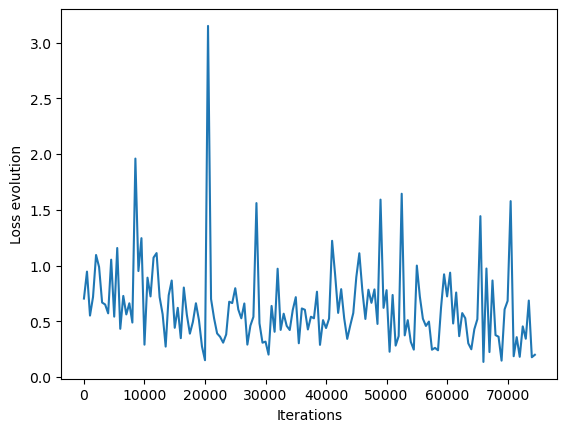

In [27]:
#Cross Entropy Loss with batch size 10 and epoch 5

BATCH_SIZE = 10
trainloader1 = DataLoader(train_data, BATCH_SIZE, shuffle = True)
testloader1 = DataLoader(test_data,BATCH_SIZE,shuffle = True)

bonus(nn.CrossEntropyLoss(),5)
size_test = test_data.data.shape[0]

correct = 0

for data in testloader1:
    inputs, labels = data
    outputs = mlp(inputs)# To do
    loss = criterion(outputs,labels)# To do
    predicted = torch.argmax(outputs,dim=1) # To do
    correct += (predicted == labels).sum()  
final_accuracy = correct.item()/size_test *100 # To do
# print(size_test)
print("Accuracy = ",final_accuracy)

epoch 0, input = 0, loss = 0.3668631911277771
epoch 0, input = 2000, loss = 0.3917672634124756
epoch 0, input = 4000, loss = 0.6340008974075317
epoch 0, input = 6000, loss = 0.3021213114261627
epoch 0, input = 8000, loss = 0.28420794010162354
epoch 0, input = 10000, loss = 0.14186133444309235
epoch 0, input = 12000, loss = 0.7502011060714722
epoch 0, input = 14000, loss = 0.49737828969955444
epoch 1, input = 0, loss = 0.8678293228149414
epoch 1, input = 2000, loss = 0.09582030773162842
epoch 1, input = 4000, loss = 0.22006526589393616
epoch 1, input = 6000, loss = 0.3330749273300171
epoch 1, input = 8000, loss = 0.6466903686523438
epoch 1, input = 10000, loss = 0.5144625902175903
epoch 1, input = 12000, loss = 0.07247031480073929
epoch 1, input = 14000, loss = 0.9211206436157227
epoch 2, input = 0, loss = 0.14891375601291656
epoch 2, input = 2000, loss = 0.22325174510478973
epoch 2, input = 4000, loss = 0.5915780067443848
epoch 2, input = 6000, loss = 0.3795114755630493
epoch 2, input 

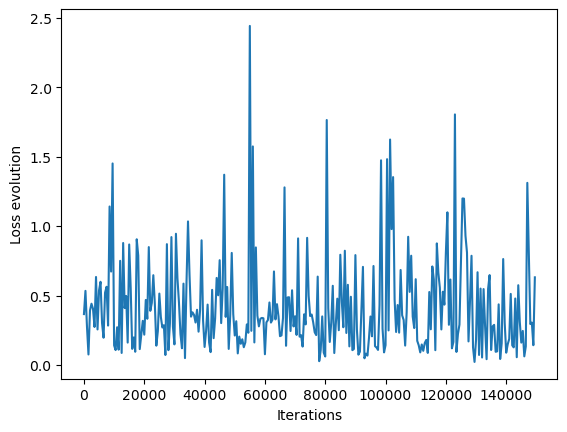

In [28]:
#Cross Entropy Loss with batch size 10 and epoch 10

BATCH_SIZE = 10
trainloader2 = DataLoader(train_data, BATCH_SIZE, shuffle = True)
testloader2 = DataLoader(test_data,BATCH_SIZE,shuffle = True)

bonus(nn.CrossEntropyLoss(),10)
size_test = test_data.data.shape[0]

correct = 0

for data in testloader2:
    inputs, labels = data
    outputs = mlp(inputs)# To do
    loss = criterion(outputs,labels)# To do
    predicted = torch.argmax(outputs,dim=1) # To do
    correct += (predicted == labels).sum()  
final_accuracy = correct.item()/size_test *100 # To do
# print(size_test)
print("Accuracy = ",final_accuracy)

epoch 0, input = 0, loss = -4.613074779510498
epoch 0, input = 2000, loss = -3.612032413482666
epoch 0, input = 4000, loss = -4.7598724365234375
epoch 0, input = 6000, loss = -5.716078758239746
epoch 0, input = 8000, loss = -5.665708541870117
epoch 0, input = 10000, loss = -6.707576751708984
epoch 0, input = 12000, loss = -6.991366863250732
epoch 0, input = 14000, loss = -6.952244758605957
epoch 1, input = 0, loss = -6.098851203918457
epoch 1, input = 2000, loss = -8.25317096710205
epoch 1, input = 4000, loss = -6.768915176391602
epoch 1, input = 6000, loss = -8.533082962036133
epoch 1, input = 8000, loss = -9.910158157348633
epoch 1, input = 10000, loss = -8.236604690551758
epoch 1, input = 12000, loss = -9.1156005859375
epoch 1, input = 14000, loss = -11.676122665405273
epoch 2, input = 0, loss = -9.349135398864746
epoch 2, input = 2000, loss = -10.841924667358398
epoch 2, input = 4000, loss = -11.631120681762695
epoch 2, input = 6000, loss = -8.719507217407227
epoch 2, input = 8000,

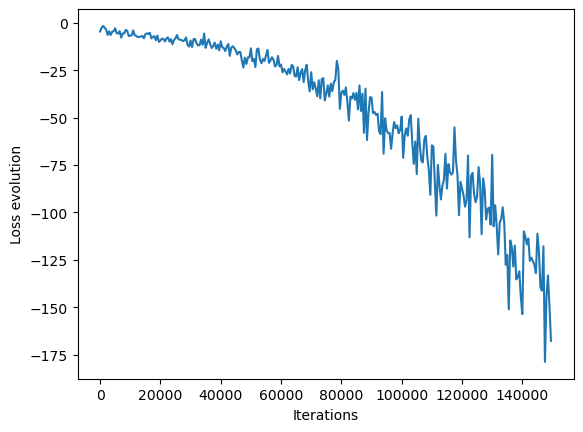

In [29]:
# NLL loss with batch size 5 and epoch 10

BATCH_SIZE = 5
trainloader3 = DataLoader(train_data, BATCH_SIZE, shuffle = True)
testloader3 = DataLoader(test_data,BATCH_SIZE,shuffle = True)

bonus(nn.NLLLoss(),10)
size_test = test_data.data.shape[0]

correct = 0

for data in testloader3:
    inputs, labels = data
    outputs = mlp(inputs)# To do
    loss = criterion(outputs,labels)# To do
    predicted = torch.argmax(outputs,dim=1) # To do
    correct += (predicted == labels).sum()  
final_accuracy = correct.item()/size_test *100 # To do
# print(size_test)
print("Accuracy = ",final_accuracy)

epoch 0, input = 0, loss = -187.9558868408203
epoch 0, input = 2000, loss = -146.33029174804688
epoch 0, input = 4000, loss = -129.91139221191406
epoch 0, input = 6000, loss = -162.14907836914062
epoch 0, input = 8000, loss = -161.6940460205078
epoch 0, input = 10000, loss = -229.77134704589844
epoch 0, input = 12000, loss = -164.5696563720703
epoch 0, input = 14000, loss = -168.9549560546875
epoch 1, input = 0, loss = -177.15724182128906
epoch 1, input = 2000, loss = -189.3448486328125
epoch 1, input = 4000, loss = -194.83145141601562
epoch 1, input = 6000, loss = -248.2783203125
epoch 1, input = 8000, loss = -217.5472869873047
epoch 1, input = 10000, loss = -165.011962890625
epoch 1, input = 12000, loss = -218.07928466796875
epoch 1, input = 14000, loss = -220.1995391845703
epoch 2, input = 0, loss = -259.0389709472656
epoch 2, input = 2000, loss = -220.04302978515625
epoch 2, input = 4000, loss = -252.46102905273438
epoch 2, input = 6000, loss = -219.7984619140625
epoch 2, input = 8

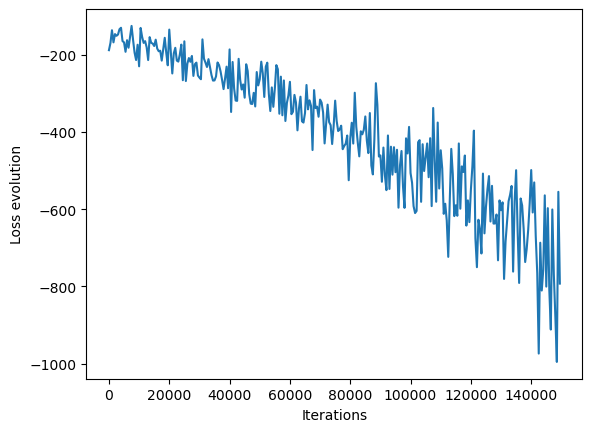

In [30]:
# NLL loss with batch size 10 and epoch 10

BATCH_SIZE = 10
trainloader4 = DataLoader(train_data, BATCH_SIZE, shuffle = True)
testloader4 = DataLoader(test_data,BATCH_SIZE,shuffle = True)

bonus(nn.NLLLoss(),10)
size_test = test_data.data.shape[0]

correct = 0

for data in testloader4:
    inputs, labels = data
    outputs = mlp(inputs)# To do
    loss = criterion(outputs,labels)# To do
    predicted = torch.argmax(outputs,dim=1) # To do
    correct += (predicted == labels).sum()  
final_accuracy = correct.item()/size_test *100 # To do
# print(size_test)
print("Accuracy = ",final_accuracy)

We observed that the model performed very badly with the nll loss. The model had an accuracy of 90 percent with crossentropy loss with a batch size of 10 and 10 epochs. We will perform some additional model training with crossentropy loss with different batch sizes and different epochs.


epoch 0, input = 0, loss = 8.4414644241333
epoch 0, input = 2000, loss = 10.637897491455078
epoch 0, input = 4000, loss = 2.7661736011505127
epoch 0, input = 6000, loss = 0.05316214635968208
epoch 0, input = 8000, loss = 0.002954525174573064
epoch 0, input = 10000, loss = 0.14854466915130615
epoch 0, input = 12000, loss = 0.08560066670179367
epoch 0, input = 14000, loss = 0.006663749925792217
epoch 1, input = 0, loss = 0.3068595826625824
epoch 1, input = 2000, loss = 0.036270979791879654
epoch 1, input = 4000, loss = 0.061149634420871735
epoch 1, input = 6000, loss = 0.2003738284111023
epoch 1, input = 8000, loss = 0.007647935301065445
epoch 1, input = 10000, loss = 0.018570885062217712
epoch 1, input = 12000, loss = 0.00042982804006896913
epoch 1, input = 14000, loss = 0.011904537677764893
epoch 2, input = 0, loss = 0.0007745652692392468
epoch 2, input = 2000, loss = 0.03602628782391548
epoch 2, input = 4000, loss = 0.001157401711679995
epoch 2, input = 6000, loss = 0.0920210257172584

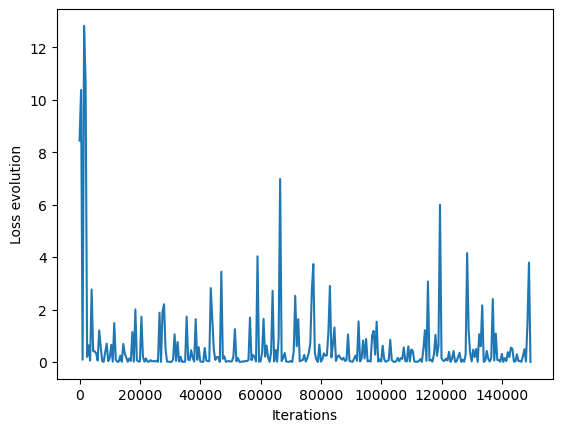

In [54]:
#Cross Entropy Loss with batch size 15 and epoch 10

BATCH_SIZE = 15
trainloader2 = DataLoader(train_data, BATCH_SIZE, shuffle = True)
testloader2 = DataLoader(test_data,BATCH_SIZE,shuffle = True)

bonus(nn.CrossEntropyLoss(),10)
size_test = test_data.data.shape[0]

correct = 0

for data in testloader2:
    inputs, labels = data
    outputs = mlp(inputs)# To do
    loss = criterion(outputs,labels)# To do
    predicted = torch.argmax(outputs,dim=1) # To do
    correct += (predicted == labels).sum()  
final_accuracy = correct.item()/size_test *100 # To do
# print(size_test)
print("Accuracy = ",final_accuracy)

epoch 0, input = 0, loss = 0.01867043413221836
epoch 0, input = 2000, loss = 0.023173673078417778
epoch 0, input = 4000, loss = 0.02330528199672699
epoch 0, input = 6000, loss = 1.223307728767395
epoch 0, input = 8000, loss = 0.3565827012062073
epoch 0, input = 10000, loss = 0.56890469789505
epoch 0, input = 12000, loss = 0.011176674626767635
epoch 0, input = 14000, loss = 0.37904489040374756
epoch 1, input = 0, loss = 0.98409104347229
epoch 1, input = 2000, loss = 0.005736800376325846
epoch 1, input = 4000, loss = 0.00027863355353474617
epoch 1, input = 6000, loss = 0.4230858087539673
epoch 1, input = 8000, loss = 0.006952698342502117
epoch 1, input = 10000, loss = 0.009089348837733269
epoch 1, input = 12000, loss = 1.7915319204330444
epoch 1, input = 14000, loss = 0.34492531418800354
epoch 2, input = 0, loss = 0.23111781477928162
epoch 2, input = 2000, loss = 0.06846939027309418
epoch 2, input = 4000, loss = 0.018965154886245728
epoch 2, input = 6000, loss = 0.03056229092180729
epoch

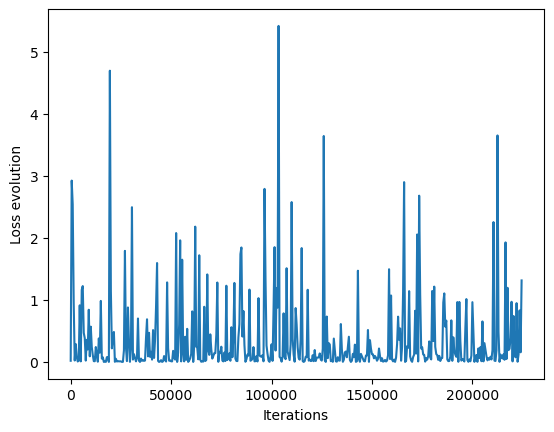

In [56]:
BATCH_SIZE = 15
trainloader2 = DataLoader(train_data, BATCH_SIZE, shuffle = True)
testloader2 = DataLoader(test_data,BATCH_SIZE,shuffle = True)

bonus(nn.CrossEntropyLoss(),15)
size_test = test_data.data.shape[0]

correct = 0

for data in testloader2:
    inputs, labels = data
    outputs = mlp(inputs)# To do
    loss = criterion(outputs,labels)# To do
    predicted = torch.argmax(outputs,dim=1) # To do
    correct += (predicted == labels).sum()  
final_accuracy = correct.item()/size_test *100 # To do
# print(size_test)
print("Accuracy = ",final_accuracy)